In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/cancer_servival.csv")

In [3]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
df.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

In [6]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


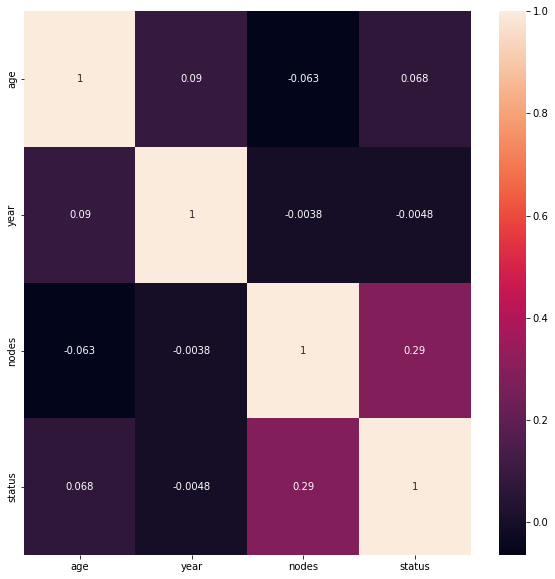

In [7]:
df_corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(df_corr,annot = True)

#with the help of pie chart will see the percentage of survived and not survived

In [8]:
status_dist = df["status"].value_counts(normalize = True)*100
status_dist

1    73.529412
2    26.470588
Name: status, dtype: float64

([<matplotlib.patches.Wedge at 0x7f160fffaad0>,
 [Text(-1.4821303443893803, 1.6258196831875968, 'survived'),
  Text(1.48213034438938, -1.6258196831875968, 'not survived')],
 [Text(-0.8084347333032983, 0.8868107362841436, '73.53%'),
  Text(0.8084347333032981, -0.8868107362841436, '26.47%')])

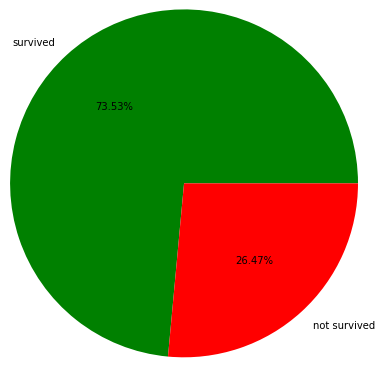

In [9]:
label = status_dist.keys().map({1:"survived",2:"not survived"})
plt.pie(x = status_dist,labels = label,colors = ["green","red"],radius = 2,autopct = "%1.2f%%")

In [10]:
label

Index(['survived', 'not survived'], dtype='object')

we can see in the pie chart there are 73.53% of prople survived and 26.47% people are not survived

#Will see number of cases in a particular year

In [11]:
No_of_cases = df["year"].value_counts()
case = pd.DataFrame(No_of_cases)
case = case.reset_index()
case.columns = ["year" , "No_of_cases"]
case

,year,No_of_cases
0,58,36
1,64,31
2,63,30
3,65,28
4,60,28
5,66,28
6,59,27
7,61,26
8,67,25
9,62,23


#With the help of lineplot will visualise the No_of_cases in a particular year

Text(0.5, 1.0, 'No_of_cases VS year')

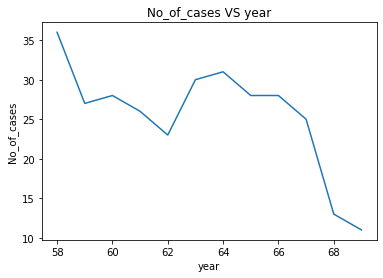

In [12]:
sns.lineplot(data = case,x = "year" , y = "No_of_cases" )
plt.title("No_of_cases VS year")

in above graph we can see how many cases found accross a year

#now lets how many survived and not survived accross a year

In [13]:
# will divide the age group
df["age"].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83])

In [16]:
# will make group of 10 ages in one group
df["age_group"] = pd.cut(df["age"],bins=[29,40,50,60,70,80,90],labels=["30-40","40-50","50-60","60-70","70-80","80-90"])
df.head()

df['statusflag']=df['status'].map({1:'Survived',2:'Not Survived'})
df.head()

,age,year,nodes,status,age_group,statusflag
0,30,64,1,1,30-40,Survived
1,30,62,3,1,30-40,Survived
2,30,65,0,1,30-40,Survived
3,31,59,2,1,30-40,Survived
4,31,65,4,1,30-40,Survived


In [17]:
pivot_table = pd.pivot_table(df,values = ["age"],index = ["year","statusflag"],columns = ["age_group"],
                             aggfunc = "count",fill_value = 0,margins=True)
pivot_table

age                                   
age_group         30-40 40-50 50-60 60-70 70-80 80-90  All
year statusflag                                           
58   Not Survived     0     5     1     5     0     1   12
     Survived         6     5     7     5     1     0   24
59   Not Survived     1     2     5     1     0     0    9
     Survived         4     6     3     5     0     0   18
60   Not Survived     0     1     2     1     0     0    4
     Survived         9     5     9     1     0     0   24
61   Not Survived     0     0     1     2     0     0    3
     Survived         1    10     7     5     0     0   23
62   Not Survived     0     2     3     2     0     0    7
     Survived         2     5     5     2     2     0   16
63   Not Survived     0     4     2     1     1     0    8
     Survived         5     8     5     3     1     0   22
64   Not Survived     0     6     1     1     0     0    8
     Survived         3     6    10     3     1     0   23
65   Not Survived     0     3     6     2     2     0   13
     Survived         3     5     2     4     1     0   15
66   Not Survived     2     1     2     1     0     0    6
     Survived         2     6     6     8     0     0   22
67   Not Survived     0     3     0     1     0     0    4
     Survived         3     5     7     4     2     0   21
68   Not Survived     0     0     2     1     0     0    3
     Survived         0     2     1     5     2     0   10
69   Not Survived     1     2     1     0     0     0    4
     Survived         1     1     5     0     0     0    7
All                  43    93    93    63    13     1  306

#Now lets build a model for Prediction

In [18]:
df.head()

,age,year,nodes,status,age_group,statusflag
0,30,64,1,1,30-40,Survived
1,30,62,3,1,30-40,Survived
2,30,65,0,1,30-40,Survived
3,31,59,2,1,30-40,Survived
4,31,65,4,1,30-40,Survived


In [19]:
df.drop(["age_group","statusflag"],axis = 1,inplace = True)

In [20]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [21]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
x

,age,year,nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
...,...,...,...
301,75,62,1
302,76,67,0
303,77,65,3
304,78,65,1


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    2
305    2
Name: status, Length: 306, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

In [26]:
param_grid = {
              "criterion":["gini","entropy"],
              "max_depth":randint(1,5),
              "max_features":randint(1,4)
}

In [27]:
model1 = DecisionTreeClassifier()

In [28]:
random_search = RandomizedSearchCV(estimator = model1 , param_distributions = param_grid , cv = 10,n_iter = 20) 

In [29]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f160e874450>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f160e874650>})

In [30]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=1)

In [31]:
random_search.best_score_*100

77.08333333333333